<font color='MediumSeaGreen'> 
    
# Build a Machine Learning Classifier to Detect Arabic Dialects on New Text

Steps:
1. Download a structured dataset from Kaggle with the Egyptian and Modern Standard Arabic dialects already labeled, scrapped from Wikipedia articles in the two dialects
2. Select and evaluate the best machine learning model to analyze Arabic text
3. Deploy model on new tweets in Arabic

<font color='MediumSeaGreen'> 

### Arabic - Egyptian Corpus

Dataset Citation: Kaggle, Arabic - Egyptian comparable Wikipedia corpus
- https://www.kaggle.com/mksaad/arb-egy-cmp-corpus

In [49]:
#import json dataset and create pandas dataframe
import pandas as pd
import json   

lines = open('ar_arz_wiki_corpus.json').readlines()

In [50]:
df = pd.DataFrame(json.loads(line) for line in lines) #convert json to df

In [51]:
display(df.head())
display(df.tail())
display(df.shape)

,filename,label,text
0,doc_007757.txt,ar,أبريل\nأبريل أو نيسان أو يوم اليوم الثاني من ا...
1,doc_009856.txt,ar,السيرابيوم\nالسيرابيوم هو اسم يطلق على كل معبد...
2,doc_002548.txt,ar,أبريل\nأبريل أو نيسان أو يوم اليوم السابع من ا...
3,doc_001469.txt,ar,الأحزاب السياسية في جنوب السودان\nهذه الصفحة ه...
4,doc_007734.txt,ar,قصر بعبدا\nقصر بعبدا بالانجليزية هو مقر الرئاس...


,filename,label,text
18858,doc_005163.txt,arz,البشير وكين\nالبشير وكين ممثل مغربي اتولد بمدي...
18859,doc_000519.txt,arz,القديس سيركيوس\nالقديس سيركيوس هو البابا التما...
18860,doc_006282.txt,arz,اشرف بنيامين\nأشرف بنيامين القاهرة هو مايسترو ...
18861,doc_003537.txt,arz,اغسطس\nاغسطس هو اليوم فى السنة الكبيسة من ايام...
18862,doc_008546.txt,arz,وسط بيروت\nوسط بيروت هى منطقة فى العاصمة اللبن...


(18863, 3)

<font color='MediumSeaGreen'> 

### Preprocess Text

We keep the text preprocessing fairly simple. It inlcudes removing punctuation, new line HTML makrs, and numbers. These were downloaded from scraping Wikipedia and no other text processing is necessary at this point, which maintains the integrity of the text data.

In [52]:
import re
from unidecode import unidecode

def pre_process(column):
    
    column = re.sub('[^\w\s]','', column) #removes punctuation
    column = re.sub('\n', ' ', column) #removes new line
    column = re.sub('\d+', ' ', column) #removes numbers
    #column = column.strip().strip('"').strip("'").lower().strip()
    
    if not column:
        column = None
    return column

In [53]:
df['text_clean'] = df['text'].apply(pre_process)

In [54]:
display(df.head())
display(df.shape)

,filename,label,text,text_clean
0,doc_007757.txt,ar,أبريل\nأبريل أو نيسان أو يوم اليوم الثاني من ا...,أبريل أبريل أو نيسان أو يوم اليوم الثاني من ال...
1,doc_009856.txt,ar,السيرابيوم\nالسيرابيوم هو اسم يطلق على كل معبد...,السيرابيوم السيرابيوم هو اسم يطلق على كل معبد ...
2,doc_002548.txt,ar,أبريل\nأبريل أو نيسان أو يوم اليوم السابع من ا...,أبريل أبريل أو نيسان أو يوم اليوم السابع من ال...
3,doc_001469.txt,ar,الأحزاب السياسية في جنوب السودان\nهذه الصفحة ه...,الأحزاب السياسية في جنوب السودان هذه الصفحة هي...
4,doc_007734.txt,ar,قصر بعبدا\nقصر بعبدا بالانجليزية هو مقر الرئاس...,قصر بعبدا قصر بعبدا بالانجليزية هو مقر الرئاسة...


(18863, 4)

<font color='MediumSeaGreen'> 

### Exploratory Data Analysis on Text

In [7]:
df.label.value_counts(normalize=True)*100

ar     51.619573
arz    48.380427
Name: label, dtype: float64

Checking the balance within the dataset between the classification of the two dialects. Fortunatley it is a 51.61% to 48.38 split, so it is fairly balanced and no futher work on the distribution of the classes is necessary at this point.

<font color='MediumSeaGreen'> 

#### Arabic stopwords

In [55]:
import nltk
nltk.download("stopwords") #arabic stopwords are not biult-in, so we find them by calling a set object
arb_stopwords = set(nltk.corpus.stopwords.words("arabic"))

[nltk_data] Downloading package stopwords to /home/dog/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
print(arb_stopwords)

{'عليه', 'لسنا', 'هنالك', 'هؤلاء', 'أنت', 'هاتين', 'منه', 'أن', 'اللذين', 'بلى', 'لكنما', 'ذات', 'لو', 'لم', 'مهما', 'بماذا', 'ذواتي', 'اللاتي', 'أو', 'كلا', 'لعل', 'ليسوا', 'والذي', 'أولاء', 'كل', 'كلما', 'تين', 'ته', 'عل', 'تلكم', 'ذواتا', 'لكي', 'كأنما', 'أقل', 'أنتما', 'بهم', 'تينك', 'كما', 'لكم', 'كيت', 'ذاك', 'ذا', 'لستم', 'بك', 'ثمة', 'بهن', 'بيد', 'كليكما', 'لنا', 'هيت', 'اللتيا', 'بكن', 'تي', 'اللواتي', 'لكيلا', 'أنى', 'أما', 'مه', 'فيما', 'منها', 'وإذ', 'ذينك', 'ذان', 'حتى', 'أنا', 'آها', 'قد', 'هما', 'هاتي', 'ليسا', 'أنتم', 'هم', 'إما', 'هنا', 'إنه', 'بمن', 'لستن', 'نعم', 'هو', 'إليك', 'بها', 'أولئك', 'ممن', 'وإن', 'ولكن', 'مع', 'مما', 'هذين', 'أيها', 'ما', 'سوى', 'لستما', 'ماذا', 'هل', 'اللذان', 'فإن', 'لدى', 'لولا', 'ألا', 'كأين', 'كليهما', 'بي', 'ها', 'اللتان', 'كيفما', 'ذو', 'بهما', 'ذين', 'حبذا', 'عدا', 'عن', 'هذه', 'حيث', 'بكم', 'كي', 'هيهات', 'آه', 'إلى', 'لها', 'له', 'به', 'لهن', 'ذوا', 'كم', 'لسن', 'آي', 'إن', 'لست', 'هكذا', 'عليك', 'اللائي', 'كذلك', 'هناك', 'لكما',

In [57]:
def delete_stop_words(mess):
    
    stop_words = set(nltk.corpus.stopwords.words("arabic"))
    
    return ' '.join(word for word in mess.split() if word not in stop_words and len(word)>1)

In [58]:
df['text_clean'] = df['text_clean'].apply(delete_stop_words)

Dataset Labels:
- ar - Modern Standard Arabic
- arz - Egyptian Arabic dialect

In [12]:
df_ar = df[df['label'] == 'ar'] #split into ar and arz datasets
df_arz = df[df['label'] == 'arz']

In [13]:
display(df_ar.head())
display(df_ar.tail())

,filename,label,text,text_clean
0,doc_007757.txt,ar,أبريل\nأبريل أو نيسان أو يوم اليوم الثاني من ا...,أبريل أبريل نيسان يوم اليوم الثاني الشهر الراب...
1,doc_009856.txt,ar,السيرابيوم\nالسيرابيوم هو اسم يطلق على كل معبد...,السيرابيوم السيرابيوم اسم يطلق معبد هيكل ديني ...
2,doc_002548.txt,ar,أبريل\nأبريل أو نيسان أو يوم اليوم السابع من ا...,أبريل أبريل نيسان يوم اليوم السابع الشهر الراب...
3,doc_001469.txt,ar,الأحزاب السياسية في جنوب السودان\nهذه الصفحة ه...,الأحزاب السياسية جنوب السودان الصفحة قائمة للأ...
4,doc_007734.txt,ar,قصر بعبدا\nقصر بعبدا بالانجليزية هو مقر الرئاس...,قصر بعبدا قصر بعبدا بالانجليزية مقر الرئاسة ال...


,filename,label,text,text_clean
9732,doc_005163.txt,ar,البشير وكين\nالبشير وكين ممثل مغربي من مواليد ...,البشير وكين البشير وكين ممثل مغربي مواليد الدا...
9733,doc_000519.txt,ar,سيرغيوس\nالبابا القديس سيرغيوس باللاتينية هو أ...,سيرغيوس البابا القديس سيرغيوس باللاتينية أسقف ...
9734,doc_006282.txt,ar,أشرف بنيامين\nأشرف بنيامين قائد أوركسترا سيمفو...,أشرف بنيامين أشرف بنيامين قائد أوركسترا سيمفون...
9735,doc_003537.txt,ar,أغسطس\nأغسطس أو آب أو يوم اليوم الرابع والعشرو...,أغسطس أغسطس آب يوم اليوم الرابع والعشرون الشهر...
9736,doc_008546.txt,ar,وسط بيروت\nوسط بيروت هي منطقة في العاصمة اللبن...,وسط بيروت وسط بيروت منطقة العاصمة اللبنانية بي...


In [14]:
display(df_arz.head())
display(df_arz.tail())

,filename,label,text,text_clean
9737,doc_007757.txt,arz,ابريل\nابريل هو اليوم فى السنة الكبيسة من ايام...,ابريل ابريل اليوم فى السنة الكبيسة ايام السنة ...
9738,doc_009856.txt,arz,سيرابيوم\nالسيراپيوم مكان محفور فى صخور سقاره ...,سيرابيوم السيراپيوم مكان محفور فى صخور سقاره ف...
9739,doc_002548.txt,arz,ابريل\nابريل هو اليوم فى السنة الكبيسة من ايام...,ابريل ابريل اليوم فى السنة الكبيسة ايام السنة ...
9740,doc_007734.txt,arz,قصر بعبدا\nقصر بعبدا هو مقر رئاسة الجمهورية ال...,قصر بعبدا قصر بعبدا مقر رئاسة الجمهورية اللبنا...
9741,doc_005433.txt,arz,سريان\nالسريان او الاشوريين هما الشعب الأرامى ...,سريان السريان او الاشوريين الشعب الأرامى الأشو...


,filename,label,text,text_clean
18858,doc_005163.txt,arz,البشير وكين\nالبشير وكين ممثل مغربي اتولد بمدي...,البشير وكين البشير وكين ممثل مغربي اتولد بمدين...
18859,doc_000519.txt,arz,القديس سيركيوس\nالقديس سيركيوس هو البابا التما...,القديس سيركيوس القديس سيركيوس البابا التمانية ...
18860,doc_006282.txt,arz,اشرف بنيامين\nأشرف بنيامين القاهرة هو مايسترو ...,اشرف بنيامين أشرف بنيامين القاهرة مايسترو مصرى...
18861,doc_003537.txt,arz,اغسطس\nاغسطس هو اليوم فى السنة الكبيسة من ايام...,اغسطس اغسطس اليوم فى السنة الكبيسة ايام السنة ...
18862,doc_008546.txt,arz,وسط بيروت\nوسط بيروت هى منطقة فى العاصمة اللبن...,وسط بيروت وسط بيروت هى منطقة فى العاصمة اللبنا...


<font color='MediumSeaGreen'> 

#### Segment Unigrams

In [15]:
import nltk
from nltk.tokenize import word_tokenize

corpus = df_ar.text_clean.str.cat(sep=' ')

#function to split text into word
tokens = word_tokenize(corpus)

vocabulary = set(tokens)
print(len(vocabulary))

frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:20]

351603


['عام',
 'كان',
 'كانت',
 'وقد',
 'وفي',
 'قبل',
 'سنة',
 'بن',
 'خلال',
 'وكان',
 'تم',
 'مصر',
 'مثل',
 'أيضا',
 'العالم',
 'أنه',
 'وهي',
 'مدينة',
 'عدد',
 'القرن']

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(1,1).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_ar['text_clean'], 50)

In [17]:
df1_ar = pd.DataFrame(common_words, columns = ['word' , 'count'])
df1_ar.head(50) #without stopwords

,word,count
0,عام,45295
1,كان,34069
2,كانت,20528
3,وقد,18980
4,وفي,17888
5,قبل,15303
6,سنة,15037
7,بن,13680
8,خلال,12779
9,وكان,12661


In [18]:
import nltk
from nltk.tokenize import word_tokenize

corpus_2 = df_arz.text_clean.str.cat(sep=' ')

tokens_2 = word_tokenize(corpus_2)

vocabulary_2 = set(tokens_2)
print(len(vocabulary_2))

frequency_dist_2 = nltk.FreqDist(tokens_2)
sorted(frequency_dist_2,key=frequency_dist_2.__getitem__, reverse=True)[0:20]

122343


['فى',
 'اللى',
 'كان',
 'سنة',
 'مصر',
 'كانت',
 'ان',
 'او',
 'فيلم',
 'دى',
 'هى',
 'ده',
 'عشان',
 'انه',
 'يوم',
 'محمد',
 'زى',
 'مش',
 'بن',
 'كمان']

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(1,1).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_arz['text_clean'], 50)

In [20]:
df2_arz = pd.DataFrame(common_words, columns = ['word' , 'count'])
df2_arz.head(50)

,word,count
0,فى,52308
1,اللى,15605
2,كان,10629
3,سنة,9835
4,مصر,9018
5,كانت,4780
6,ان,4675
7,او,4579
8,فيلم,3326
9,دى,3272


In [42]:
arz = df2_arz.head(500)

<font color='MediumSeaGreen'> 

#### Bi-grams

الولايات المتحدة 3859
وفي عام 2803
لكرة القدم 2173
عبد الله 1940
الحرب العالمية 1935
قبل الميلاد 1597
القرن العشرين 1582
كأس العالم 1472
مرة أخرى 1412
القرن التاسع 1407
التاسع عشر 1362
بن عبد 1227
محمد بن 1220
العالمية الثانية 1157
سبيل المثال 1144
صلاح الدين 1104
الأمم المتحدة 1067
المملكة المتحدة 1059
كرة القدم 1036
لأول مرة 1035


Text(0.5, 0, 'count')

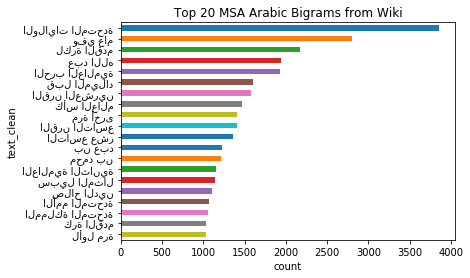

In [26]:
import matplotlib.pyplot as plt
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df_ar['text_clean'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['text_clean' , 'count'])
df2.groupby('text_clean').sum()['count'].sort_values(ascending=False).plot.barh().invert_yaxis()
plt.title('Top 20 MSA Arabic Bigrams from Wiki')
plt.xlabel('count')

In [28]:
#removes stopwords again
df_arz['text_clean'] = df_arz['text_clean'].apply(delete_stop_words)

/home/dog/myENV/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


فى مصر 2198
فى سنة 1594
اللى كان 1281
مصر كنيسة 811
فى العالم 724
اللى كانت 673
مصر فى 618
سنة فى 580
صلاح الدين 568
اتولد فى 564
فى القاهره 551
فى مدينة 534
فى القرن 490
فى التقويم 438
فى نفس 410
التقويم الجريجورى 410
فى عهد 402
فى السنة 386
لحد نهاية 366
السنة فى 365


Text(0.5, 0, 'count')

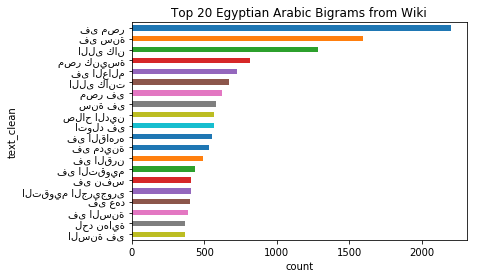

In [29]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df_arz['text_clean'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['text_clean' , 'count'])
df2.groupby('text_clean').sum()['count'].sort_values(ascending=False).plot.barh().invert_yaxis()
plt.title('Top 20 Egyptian Arabic Bigrams from Wiki')
plt.xlabel('count')

<font color='MediumSeaGreen'> 

#### Arabic Stemmer

In [30]:
#run check that the stemmer works
import nltk
from nltk.stem.isri import ISRIStemmer
stemmer  = ISRIStemmer()
w= 'حركات'
print(stemmer .stem(w))

حرك


In [31]:
df['stemmed'] = df["text_clean"].apply(lambda x: [stemmer.stem(y) for y in x])
df.head()

,filename,label,text,text_clean,stemmed
0,doc_007757.txt,ar,أبريل\nأبريل أو نيسان أو يوم اليوم الثاني من ا...,أبريل أبريل نيسان يوم اليوم الثاني الشهر الراب...,"[ا, ب, ر, ي, ل, , ا, ب, ر, ي, ل, , ن, ي, س, ..."
1,doc_009856.txt,ar,السيرابيوم\nالسيرابيوم هو اسم يطلق على كل معبد...,السيرابيوم السيرابيوم اسم يطلق معبد هيكل ديني ...,"[ا, ل, س, ي, ر, ا, ب, ي, و, م, , ا, ل, س, ي, ..."
2,doc_002548.txt,ar,أبريل\nأبريل أو نيسان أو يوم اليوم السابع من ا...,أبريل أبريل نيسان يوم اليوم السابع الشهر الراب...,"[ا, ب, ر, ي, ل, , ا, ب, ر, ي, ل, , ن, ي, س, ..."
3,doc_001469.txt,ar,الأحزاب السياسية في جنوب السودان\nهذه الصفحة ه...,الأحزاب السياسية جنوب السودان الصفحة قائمة للأ...,"[ا, ل, ا, ح, ز, ا, ب, , ا, ل, س, ي, ا, س, ي, ..."
4,doc_007734.txt,ar,قصر بعبدا\nقصر بعبدا بالانجليزية هو مقر الرئاس...,قصر بعبدا قصر بعبدا بالانجليزية مقر الرئاسة ال...,"[ق, ص, ر, , ب, ع, ب, د, ا, , ق, ص, ر, , ب, ..."


In [33]:
print(df['stemmed'][0])

['ا', 'ب', 'ر', 'ي', 'ل', ' ', 'ا', 'ب', 'ر', 'ي', 'ل', ' ', 'ن', 'ي', 'س', 'ا', 'ن', ' ', 'ي', 'و', 'م', ' ', 'ا', 'ل', 'ي', 'و', 'م', ' ', 'ا', 'ل', 'ث', 'ا', 'ن', 'ي', ' ', 'ا', 'ل', 'ش', 'ه', 'ر', ' ', 'ا', 'ل', 'ر', 'ا', 'ب', 'ع', ' ', 'ا', 'ل', 'ي', 'و', 'م', ' ', 'ا', 'ل', 'ث', 'ا', 'ن', 'ي', ' ', 'و', 'ا', 'ل', 'ت', 'س', 'ع', 'و', 'ن', ' ', 'ا', 'ل', 'س', 'ن', 'ة', ' ', 'ا', 'ل', 'ب', 'س', 'ي', 'ط', 'ة', ' ', 'ا', 'ل', 'ي', 'و', 'م', ' ', 'ا', 'ل', 'ث', 'ا', 'ل', 'ث', ' ', 'و', 'ا', 'ل', 'ت', 'س', 'ع', 'و', 'ن', ' ', 'ا', 'ل', 'س', 'ن', 'و', 'ا', 'ت', ' ', 'ا', 'ل', 'ك', 'ب', 'ي', 'س', 'ة', ' ', 'و', 'ف', 'ق', 'ا', ' ', 'ل', 'ل', 'ت', 'ق', 'و', 'ي', 'م', ' ', 'ا', 'ل', 'م', 'ي', 'ل', 'ا', 'د', 'ي', ' ', 'ا', 'ل', 'غ', 'ر', 'ب', 'ي', ' ', 'ا', 'ل', 'غ', 'ر', 'ي', 'غ', 'و', 'ر', 'ي', ' ', 'ي', 'ب', 'ق', 'ى', ' ', 'ب', 'ع', 'د', 'ه', ' ', 'ي', 'و', 'م', 'ا', ' ', 'ل', 'ا', 'ن', 'ت', 'ه', 'ا', 'ء', ' ', 'ا', 'ل', 'س', 'ن', 'ة']


In [36]:
df1_ar['stemmed'] = df1_ar["word"].apply(lambda x: [stemmer.stem(y) for y in x])
df1_ar.head()

,word,count,stemmed
0,عام,45295,"[ع, ا, م]"
1,كان,34069,"[ك, ا, ن]"
2,كانت,20528,"[ك, ا, ن, ت]"
3,وقد,18980,"[و, ق, د]"
4,وفي,17888,"[و, ف, ي]"


In [39]:
from snowballstemmer import stemmer
ar_stemmer = stemmer("arabic")
ar_stemmer.stemWord(u"فسميتموها") #exmaple to check that it works

'سمي'

In [40]:
df['stemmed 2'] = df["text_clean"].apply(lambda x: [ar_stemmer.stemWord(y) for y in x])
df.head()

,filename,label,text,text_clean,stemmed,stemmed 2
0,doc_007757.txt,ar,أبريل\nأبريل أو نيسان أو يوم اليوم الثاني من ا...,أبريل أبريل نيسان يوم اليوم الثاني الشهر الراب...,"[ا, ب, ر, ي, ل, , ا, ب, ر, ي, ل, , ن, ي, س, ...","[ء, ب, ر, ي, ل, , ء, ب, ر, ي, ل, , ن, ي, س, ..."
1,doc_009856.txt,ar,السيرابيوم\nالسيرابيوم هو اسم يطلق على كل معبد...,السيرابيوم السيرابيوم اسم يطلق معبد هيكل ديني ...,"[ا, ل, س, ي, ر, ا, ب, ي, و, م, , ا, ل, س, ي, ...","[ا, ل, س, ي, ر, ا, ب, ي, و, م, , ا, ل, س, ي, ..."
2,doc_002548.txt,ar,أبريل\nأبريل أو نيسان أو يوم اليوم السابع من ا...,أبريل أبريل نيسان يوم اليوم السابع الشهر الراب...,"[ا, ب, ر, ي, ل, , ا, ب, ر, ي, ل, , ن, ي, س, ...","[ء, ب, ر, ي, ل, , ء, ب, ر, ي, ل, , ن, ي, س, ..."
3,doc_001469.txt,ar,الأحزاب السياسية في جنوب السودان\nهذه الصفحة ه...,الأحزاب السياسية جنوب السودان الصفحة قائمة للأ...,"[ا, ل, ا, ح, ز, ا, ب, , ا, ل, س, ي, ا, س, ي, ...","[ا, ل, ء, ح, ز, ا, ب, , ا, ل, س, ي, ا, س, ي, ..."
4,doc_007734.txt,ar,قصر بعبدا\nقصر بعبدا بالانجليزية هو مقر الرئاس...,قصر بعبدا قصر بعبدا بالانجليزية مقر الرئاسة ال...,"[ق, ص, ر, , ب, ع, ب, د, ا, , ق, ص, ر, , ب, ...","[ق, ص, ر, , ب, ع, ب, د, ا, , ق, ص, ر, , ب, ..."


Stemming Arabic words has proven to be quite difficult. Both NLTK's ISRIStemmer and the snowballstemmer reduced all the Arabic words to a single letter, instead of their three letter root. In process of trying other packages from GitHub.

<font color='MediumSeaGreen'> 

#### Rare Words List

In [30]:
freq = pd.Series(' '.join(df_ar['text_clean']).split()).value_counts()[-25:]
freq #rare words in df_ar

بغدى             1
اربد             1
المسلوخة         1
أخالتسيخه        1
متكلا            1
ساخطه            1
قدسون            1
وتشيليابتسك      1
نسختنا           1
الجليسيرين       1
والبوسليسترين    1
ألبانيتين        1
إزيكم            1
فتستضيف          1
بعملاتها         1
وتحوز            1
نهون             1
الشعبوي          1
إبراهين          1
ونهوض            1
فالغنى           1
تلقيحه           1
الأحبال          1
للنتقل           1
كالانخفاضات      1
dtype: int64

In [31]:
freq2 = pd.Series(' '.join(df_arz['text_clean']).split()).value_counts()[-25:]
freq2 #rare words in df_arz

شاهو             1
ديكارتو          1
بتوصفهم          1
الارتدوكسيه      1
أيات             1
لصيغ             1
عوضا             1
سيڤيلا           1
ربيئل            1
أجدادها          1
الصوغيره         1
ازبيجان          1
والدكاترة        1
بيعتمدش          1
عالقة            1
چيوجرافيك        1
مباركة           1
وتفصل            1
وانشدي           1
تسلمش            1
الفكهانى         1
للقديسة          1
المركزالثقافى    1
الدياب           1
بتبسط            1
dtype: int64

<font color='MediumSeaGreen'> 

#### Find Differences in Lists

In [41]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()
bag_of_words_ar = count.fit_transform(df_ar['text_clean'])
feature_names_ar = count.get_feature_names()

In [42]:
bag_of_words_arz = count.fit_transform(df_arz['text_clean'])
feature_names_arz = count.get_feature_names()

In [35]:
diff_egy = set(feature_names_ar) ^ set(feature_names_arz)

In [43]:
egyptian_arabic = list(diff_egy)

In [37]:
#renders a list of 318,000 words 
arz = pd.DataFrame(egyptian_arabic) 
arz.to_excel("ARZ only.xlsx")

<font color='MediumSeaGreen'> 

# Dialect Detection with Machine Learning

Our goal is to classify text data into dialectical categories. According to SciKit learn's machine learning map,  https://scikit-learn.org/stable/tutorial/machine_learning_map/, the first model to detect the categories with less than 100K samples would be a Linear Support Vector Machine, and if that doesn't work we should use a Naive Bayes model. However, we will explore how to select a model for this project.

In [59]:
df.drop(columns=['filename', 'text'], inplace=True)

In [60]:
df.head()

,label,text_clean
0,ar,أبريل أبريل نيسان يوم اليوم الثاني الشهر الراب...
1,ar,السيرابيوم السيرابيوم اسم يطلق معبد هيكل ديني ...
2,ar,أبريل أبريل نيسان يوم اليوم السابع الشهر الراب...
3,ar,الأحزاب السياسية جنوب السودان الصفحة قائمة للأ...
4,ar,قصر بعبدا قصر بعبدا بالانجليزية مقر الرئاسة ال...


<font color='MediumSeaGreen'> 

### Convert Text to Numerical Features

In [131]:
from sklearn.model_selection import train_test_split

data = df['text_clean'].astype(str)
target = df['label'].astype('category')

# Split dataset into training set and test set before feature extraction
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.4,random_state=109) # 60% training and 40% test

In [132]:
#feature extractin starts with counting the unique features
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(11317, 299688)

In [133]:
#then transforms the features
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(11317, 299688)

In [134]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(11317, 299688)

<font color='MediumSeaGreen'> 

### Linear Support Vector Machine (SVM)

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC(random_state=0, tol=1e-5)),
                    ])

In [19]:
text_clf.fit(X_train, y_train)  

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0))])

In [20]:
import numpy as np
predicted = text_clf.predict(X_test)
np.mean(predicted == y_test) 

0.9734958918632388

In [21]:
target = df['label'].astype('category')
print('categories: {}'.format(target.cat.categories))

categories: Index(['ar', 'arz'], dtype='object')


In [22]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted,target_names=target.cat.categories))

              precision    recall  f1-score   support

          ar       0.97      0.98      0.97      3923
         arz       0.98      0.97      0.97      3623

   micro avg       0.97      0.97      0.97      7546
   macro avg       0.97      0.97      0.97      7546
weighted avg       0.97      0.97      0.97      7546



In [23]:
metrics.confusion_matrix(y_test, predicted)

array([[3849,   74],
       [ 126, 3497]])

<font color='MediumSeaGreen'> 

### SGDClassifier - Linear SVM

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                           alpha=1e-3, random_state=109,
                                           max_iter=5, tol=None,shuffle=True)),
                    ])

In [31]:
text_clf.fit(X_train, y_train)  

/home/dog/myENV/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...om_state=109, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [32]:
import numpy as np
predicted = text_clf.predict(X_test)
np.mean(predicted == y_test) 

0.9550755367081898

In [33]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted,target_names=target.cat.categories))

              precision    recall  f1-score   support

          ar       0.93      0.99      0.96      3923
         arz       0.99      0.91      0.95      3623

   micro avg       0.96      0.96      0.96      7546
   macro avg       0.96      0.95      0.95      7546
weighted avg       0.96      0.96      0.95      7546



In [34]:
metrics.confusion_matrix(y_test, predicted)

array([[3892,   31],
       [ 308, 3315]])

<font color='MediumSeaGreen'> 

### Multinomial - Naive Bayes

In [28]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [29]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
                    ])

In [37]:
text_clf.fit(X_train, y_train) 

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [38]:
import numpy as np
predicted = text_clf.predict(X_test)
np.mean(predicted == y_test)

0.9461966604823747

In [39]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted,target_names=target.cat.categories))

              precision    recall  f1-score   support

          ar       0.91      0.99      0.95      3923
         arz       0.99      0.90      0.94      3623

   micro avg       0.95      0.95      0.95      7546
   macro avg       0.95      0.94      0.95      7546
weighted avg       0.95      0.95      0.95      7546



<font color='MediumSeaGreen'> 

### Bernoulli - Naive Bayes

In [30]:
from sklearn.naive_bayes import BernoulliNB
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)),
                    ])

In [41]:
text_clf.fit(X_train, y_train)  

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...se, use_idf=True)), ('clf', BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True))])

In [42]:
predicted = text_clf.predict(X_test)
np.mean(predicted == y_test) 

0.7141531937450305

In [43]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted,target_names=target.cat.categories))

              precision    recall  f1-score   support

          ar       0.98      0.46      0.63      3923
         arz       0.63      0.99      0.77      3623

   micro avg       0.71      0.71      0.71      7546
   macro avg       0.81      0.72      0.70      7546
weighted avg       0.81      0.71      0.69      7546



<font color='MediumSeaGreen'> 

### Logistic Regression - Linear Model 

In [32]:
from sklearn.linear_model import LogisticRegression
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')),
                    ])

In [45]:
text_clf.fit(X_train, y_train) 

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip..., penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])

In [46]:
predicted = text_clf.predict(X_test)
np.mean(predicted == y_test) 

0.9734958918632388

In [47]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted,target_names=target.cat.categories))

              precision    recall  f1-score   support

          ar       0.96      0.99      0.97      3923
         arz       0.98      0.96      0.97      3623

   micro avg       0.97      0.97      0.97      7546
   macro avg       0.97      0.97      0.97      7546
weighted avg       0.97      0.97      0.97      7546



<font color='MediumSeaGreen'> 

### Random Forests - Ensemble Model

In [33]:
from sklearn.ensemble import RandomForestClassifier
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)),
                    ])

In [49]:
text_clf.fit(X_train, y_train) 

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...mators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False))])

In [50]:
predicted = text_clf.predict(X_test)
np.mean(predicted == y_test) 

0.7805459846276173

In [51]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted,target_names=target.cat.categories))

              precision    recall  f1-score   support

          ar       0.95      0.61      0.74      3923
         arz       0.69      0.97      0.81      3623

   micro avg       0.78      0.78      0.78      7546
   macro avg       0.82      0.79      0.78      7546
weighted avg       0.83      0.78      0.77      7546



<font color='MediumSeaGreen'> 

### Plot Models for Comparison

In [66]:
import numpy as np
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [67]:
import matplotlib as plt
from sklearn.model_selection import cross_val_score

models = [
    LinearSVC(random_state=0, tol=1e-5),
    SGDClassifier(loss='hinge', penalty='l2',
                                           alpha=1e-3, random_state=109,
                                           max_iter=5, tol=None,shuffle=True),
    MultinomialNB(),
    BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
    LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial'),
    RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/home/dog/myENV/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [68]:
cv_df.groupby('model_name').accuracy.mean()

model_name
BernoulliNB               0.711676
LinearSVC                 0.980826
LogisticRegression        0.979235
MultinomialNB             0.953787
RandomForestClassifier    0.805517
SGDClassifier             0.957321
Name: accuracy, dtype: float64

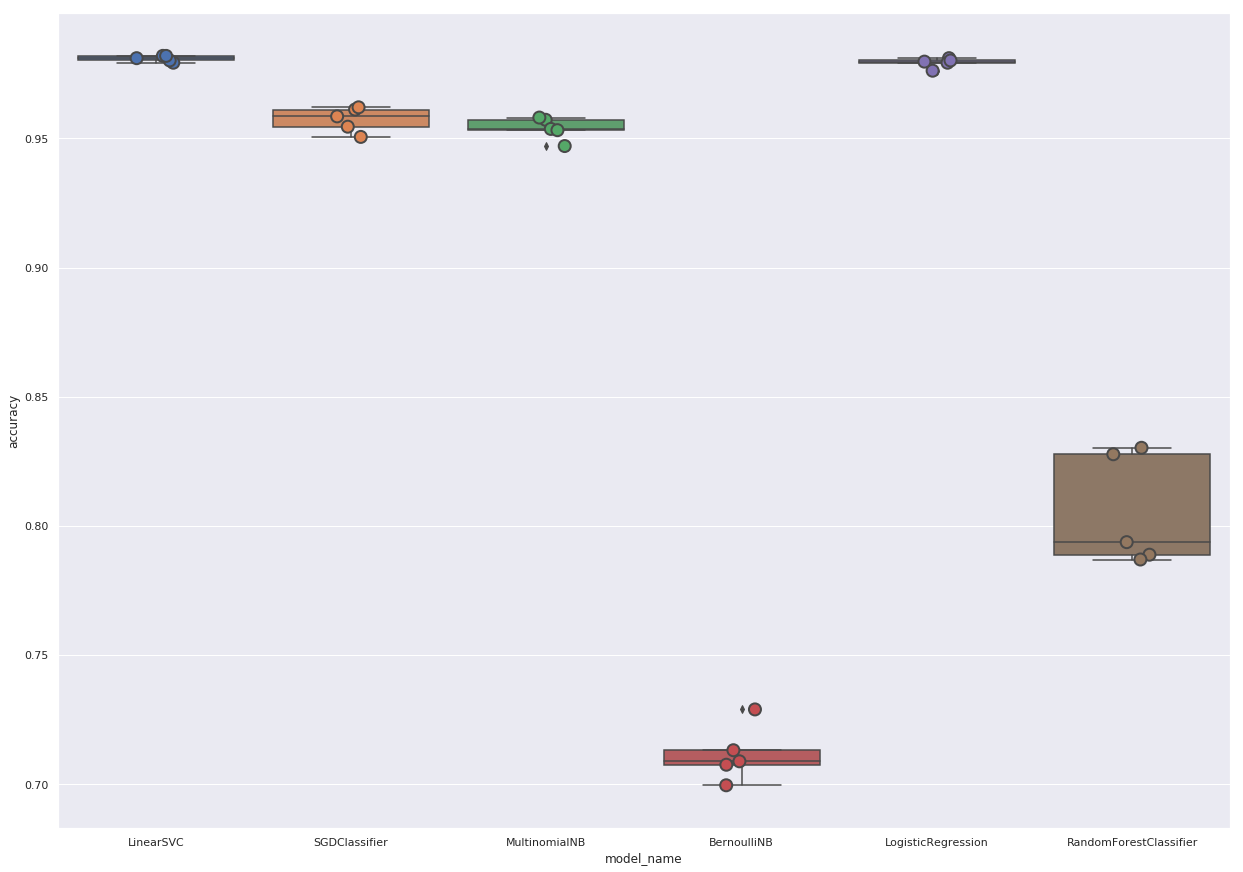

In [36]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=12, jitter=True, edgecolor="gray", linewidth=2)
sns.set(rc={'figure.figsize':(21,15)})

Plot Citation:
- https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

<font color='MediumSeaGreen'> 

### Model Selection

In [135]:
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
model = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC(random_state=0, tol=1e-5)),
                    ])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [136]:
import numpy as np
predicted = model.predict(X_test)
np.mean(predicted == y_test) 

0.9734958918632388

<font color='MediumSeaGreen'> 

### Evaluation Metrics for Classification Models

In [137]:
target = df['label'].astype('category')
print('categories: {}'.format(target.cat.categories))

categories: Index(['ar', 'arz'], dtype='object')


In [138]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted,target_names=target.cat.categories))

              precision    recall  f1-score   support

          ar       0.97      0.98      0.97      3923
         arz       0.98      0.97      0.97      3623

   micro avg       0.97      0.97      0.97      7546
   macro avg       0.97      0.97      0.97      7546
weighted avg       0.97      0.97      0.97      7546



In [139]:
#to check model, we cross validate on the test data after we used the training data to teach the model
from sklearn.model_selection import cross_val_score
X, y = data, target
scores = cross_val_score(model, X, y, cv=5)
scores  

array([0.97774245, 0.98197721, 0.98860021, 0.98780488, 0.98621421])

In [140]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.01)


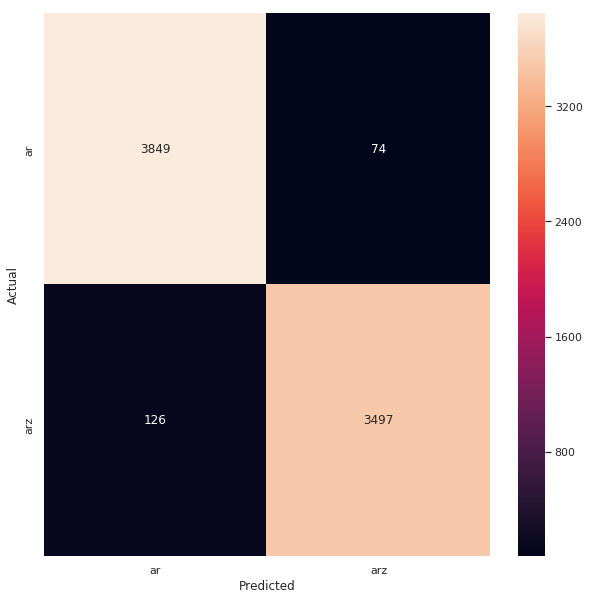

In [39]:
#create a confusion matrix to see what was accuratly predicted and what was not
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=target.cat.categories, yticklabels=target.cat.categories)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [143]:
#we change the cross validation scoring to roc_auc
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
scores  

array([0.99565876, 0.99662921, 0.99806038, 0.99858032, 0.99826808])

In [144]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 1.00 (+/- 0.00)


In [151]:
#next we calculate the f1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.97467713, 0.97219905])

In [153]:
#compare to a balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.9731795382954611

<font color='MediumSeaGreen'> 

## Deploy Dialect Detection on New Data in Arabic Tweets

<font color='MediumSeaGreen'> 

#### Load Sample Arabic Tweets Dataset

In [154]:
import pandas as pd
df_1_1 = pd.read_excel('Test.xlsx') #tweets geolocated from Cairo
df_2_2 = pd.read_excel('Test1.xlsx') #tweets geolocated from Cairo
df_3_3 = pd.read_excel('AlArabiya.xlsx') #tweets from MSA media
df_4_4 = pd.read_excel('Test_b.xlsx') #tweets from MSA media

In [155]:
frames = [df_1_1,df_2_2,df_3_3, df_4_4]
df1 = pd.concat(frames)

<font color='MediumSeaGreen'> 

#### Clean Text

In [156]:
import re
df1['clean_tweet'] = df1.Message.str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE) #removes emojis
df1['clean_tweet'] = df1.clean_tweet.str.replace('@[_A-Za-z0-9]+', '') #removes handles
df1['clean_tweet'] = df1.clean_tweet.str.replace('RT', '') #removes rt
df1['clean_tweet'] = df1.clean_tweet.str.replace('#',' ') #removes hashtag symbol only
df1['clean_tweet'] = df1.clean_tweet.str.replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True) #removes links
df1['clean_tweet'] = df1.clean_tweet.str.replace('\d+', '') #removes numbers
df1['clean_tweet'] = df1.clean_tweet.str.replace('\n', ' ') #removes new line
df1['clean_tweet'] = df1.clean_tweet.str.replace('_', '') #removes underscore
df1['clean_tweet'] = df1.clean_tweet.str.replace('[^\w\s]','') #removes punctuation

In [157]:
df1=df1[['Created At','Followers','Following','Likes','Location','Retweet Count','clean_tweet']]
df1.head() #only columsn of data for analysis were kept in the df, all usernames were removed for privacy

,Created At,Followers,Following,Likes,Location,Retweet Count,clean_tweet
0,2019-06-18 19:25:01,441,5000,1604,"Mumbai, India",0,مرحبا مكتب استقدام مومبائ الهند سائق خاص و عام...
1,2019-06-18 19:25:01,72,187,771,دولة الكويت,0,وإنني لا أملك شيئا ثمينا سوى أمي
2,2019-06-18 19:25:01,439,381,2152,NaN,0,الموضوع بيكسب فعلا انت ما بكدبش
3,2019-06-18 19:25:01,178,179,2622,NaN,0,الحمد لله المشاغبينوفلورزوفسحالصيف
4,2019-06-18 19:25:01,29,404,93,NaN,0,لامستحيللل نعم مع العقيد


<font color='MediumSeaGreen'> 

### Run Model on Tweet Message

In [158]:
#add new column with predicted dialect on each tweet message
df1['Dialect Detection'] = model.predict(df1.clean_tweet)

In [159]:
df1.head(10)

,Created At,Followers,Following,Likes,Location,Retweet Count,clean_tweet,Dialect Detection
0,2019-06-18 19:25:01,441,5000,1604,"Mumbai, India",0,مرحبا مكتب استقدام مومبائ الهند سائق خاص و عام...,ar
1,2019-06-18 19:25:01,72,187,771,دولة الكويت,0,وإنني لا أملك شيئا ثمينا سوى أمي,ar
2,2019-06-18 19:25:01,439,381,2152,NaN,0,الموضوع بيكسب فعلا انت ما بكدبش,arz
3,2019-06-18 19:25:01,178,179,2622,NaN,0,الحمد لله المشاغبينوفلورزوفسحالصيف,ar
4,2019-06-18 19:25:01,29,404,93,NaN,0,لامستحيللل نعم مع العقيد,ar
5,2019-06-18 19:25:01,814,71,275,NaN,0,السؤال دا صار يطرح نفسو بكثره والله هما اغبياء...,arz
6,2019-06-18 19:25:01,1225,996,5736,مصر,0,زعلانه ان حزنك راح,ar
7,2019-06-18 19:25:01,56,245,2105,"الطائف, المملكة العربية السعودية",0,مازلت أحتفظ بصوتك في هاتفي وأسمعه نهاية كل يوم...,ar
8,2019-06-18 19:25:01,1,24,66,NaN,0,انا متضرر من الصوت العالي للمسجد والان بحثت عن...,ar
9,2019-06-18 19:25:01,961,394,12806,bahrain,0,امشي دي ام,arz


In [162]:
df1.sort_values(by=['Location', 'Dialect Detection'] , ascending=True).head(25)

,Created At,Followers,Following,Likes,Location,Retweet Count,clean_tweet,Dialect Detection
118,2019-06-19 19:12:46,8547,214,1887,,0,ويقول يمبك ويزر ويدي,ar
771,2019-06-19 19:12:40,980,110,128,,0,لا م قلت,ar
1382,2019-06-19 19:12:35,17,130,26,,0,هههه,ar
469,2019-06-18 19:24:58,155,170,5213,,0,لا تدمني نظرا إلي فوالذي جعل الهوى قدرا على كف...,ar
824,2019-06-19 19:12:40,8144,5994,26564,,0,الجميل الفكر الواعي الراقي,ar
852,2019-06-18 19:24:55,1631,375,380,Milano,0,حيييلو هههههههههههههههههههههههههههههههههههههه...,ar
452,2019-06-18 19:24:58,663,439,468,Baghdad,0,بلنتي لفرنسا من اول وصول لمنطقة جزاء انجلترا,arz
123,2019-06-18 19:25:01,967,303,2531,#25JAN #ACAB,0,شوية مدعين خايفين ياخدوا موقف صح ففين بقى ال...,arz
1494,2019-06-19 19:12:34,593,346,73,' Saudia Arabia - ',0,اللهم إجعلنا من المتقين يا رب العالمين,ar
820,2019-06-18 19:24:55,2170,2147,16773,..☕️🖇,0,يس,ar


In [160]:
df1['Dialect Detection'].value_counts()

ar     6125
arz    2110
Name: Dialect Detection, dtype: int64

In [161]:
df1.to_excel('Dialect Predicted on Arabic Tweets.xlsx')

### Further Steps
To improve the accuracy of the model, it would be helpful to add a word list in both dialects and a list of common grammar differences.